# Notebook 14: Intro To Multiple Linear Regression
***

We'll need Numpy, Matplotlib, Pandas, and scipy.stats for this notebook, so let's load them. 

In [1]:
import numpy as np 
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

### Exercise 1 - Advertising Budgets and Simple Linear Regression
*** 

The data in advertising.csv concerns the sales of a particular product in 200 different markets, along with advertising budgets for each market for three different media types: TV, Radio, and Newspaper.  The sales feature is given in thousands of units, and each of the advertising budget features are given in thousands of dollars.


**Part A**: Load the data into a Pandas DataFrame. 

In [4]:
dfAd = pd.read_csv("advertising.csv")
dfAd.head()

,tv,radio,news,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


**Part B:** Run the following code to visualize the relationship between sales and each type of advertising:

<AxesSubplot:xlabel='news', ylabel='sales'>

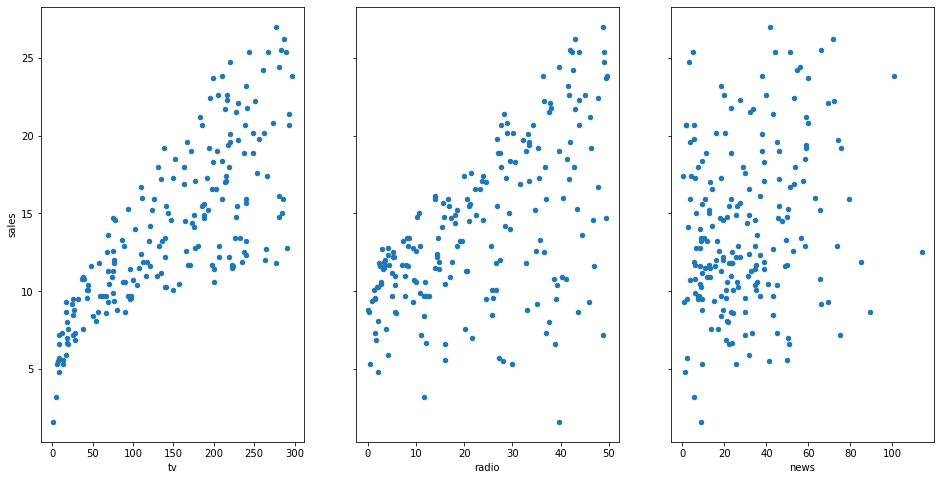

In [79]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
dfAd.plot(kind='scatter', x='tv', y='sales', ax=axs[0], figsize=(16, 8))
dfAd.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
dfAd.plot(kind='scatter', x='news', y='sales', ax=axs[2])

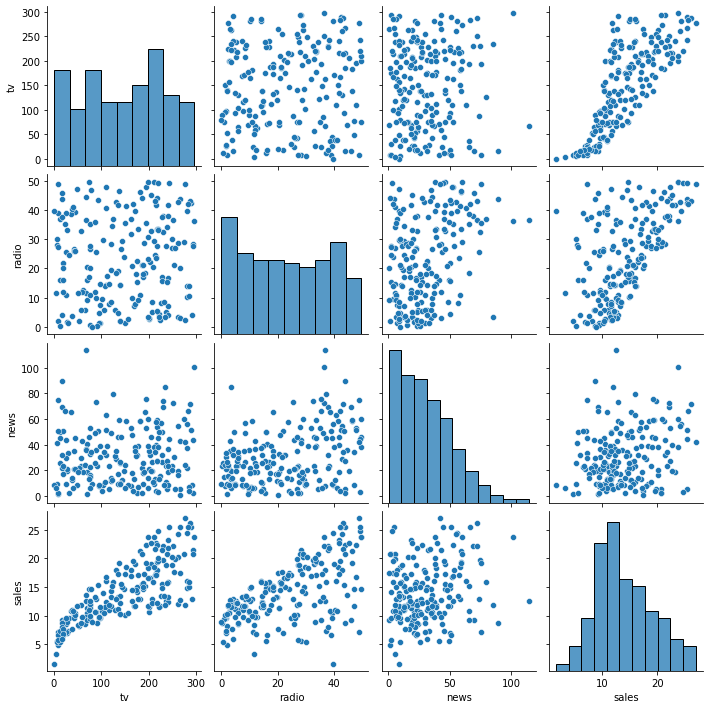

In [80]:
## ALTERNATIVE:  We can visualize the relationships with pairs plots!
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(dfAd)


## Estimating ("Learning") Model Coefficients





**Part C**: Run the following code to create three separate SLR models between each of the features, $\texttt{TV}$, $\texttt{radio}$, and $\texttt{news}$ on the response variable $\texttt{sales}$. 

From these SLR models, does there appear to be a significant relationship between each of the advertising media types and the sales of the product? 

In [104]:
def SLRmodel(x, y):
    lm=sm.OLS(y, sm.add_constant(x)).fit()

    fig, ax= plt.subplots(figsize=(20,4), ncols=3)
    ax[0].scatter(x,y)
    ax[0].plot(x, lm.fittedvalues)
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("y")
 
   
    ax[0].set_title('Data and Fit')
    ax[1].hist(lm.resid)
    ax[1].set_title('Histogram of Residuals')
    ax[1].set_xlabel("residuals")
    ax[1].set_ylabel("frequency")
    ax[2].scatter(x, lm.resid)
    ax[2].set_title('Component vs. Residuals')
    ax[2].hlines(0, xmin=np.min(x), xmax=np.max(x))
    ax[2].set_xlabel("x")
    ax[2].set_ylabel("residuals")
                 
    
    #print(lm.summary())
    
    print("Fitted Model: Y = {:.5f} + {:.5f}x".format(lm.params[0], lm.params[1]))    
    
    print("R2 is", lm.rsquared)
    
    print("The 95% Confidence interval for the slope is [", lm.conf_int(.05)[0][1],",", lm.conf_int(.05)[1][1],"]")
    
    print("The p-value for the hypothesis test that the slope is 0 is", lm.pvalues[1])

Fitted Model: Y = 7.03259 + 0.04754x
R2 is 0.611875050850071
The 95% Confidence interval for the slope is [ 0.04223071603269882 , 0.05284256483334068 ]
The p-value for the hypothesis test that the slope is 0 is 1.4673897001945922e-42


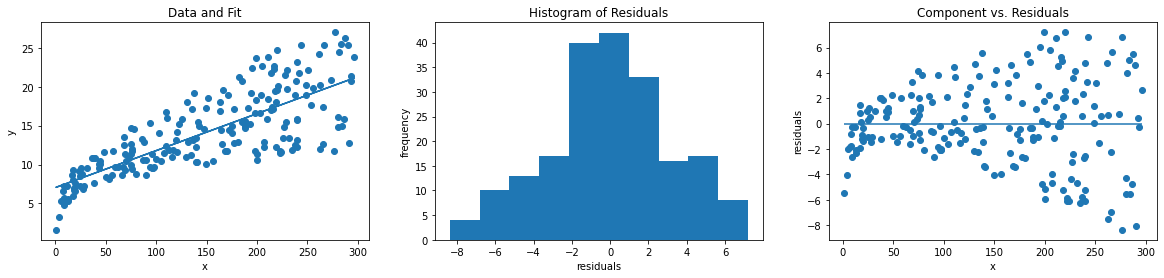

In [105]:
SLRmodel(dfAd["tv"],dfAd["sales"])



**How do we interpret the TV coefficient ($b$)? **
- A "unit" increase in TV ad spending is **associated with** a 0.047537 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 47.537 items.

Note that if an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

Fitted Model: Y = 9.31164 + 0.20250x
R2 is 0.33203245544529547
The 95% Confidence interval for the slope is [ 0.16224433050491885 , 0.24274723627996062 ]
The p-value for the hypothesis test that the slope is 0 is 4.354966001766632e-19


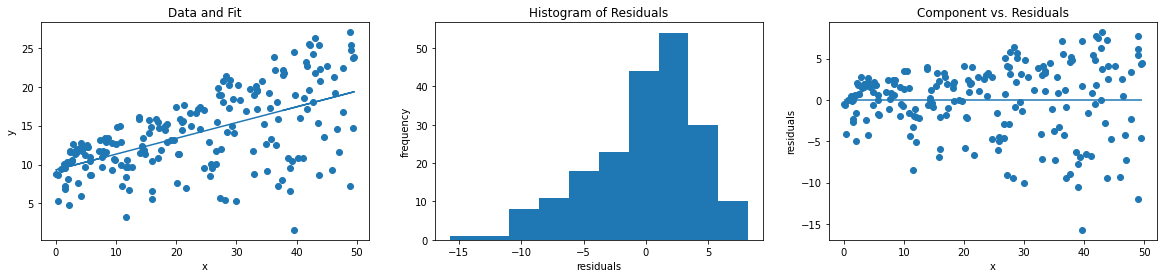

In [106]:
SLRmodel(dfAd["radio"],dfAd["sales"])

Fitted Model: Y = 12.35141 + 0.05469x
R2 is 0.05212044544430516
The 95% Confidence interval for the slope is [ 0.022005485224381213 , 0.08738071172016511 ]
The p-value for the hypothesis test that the slope is 0 is 0.001148195868888249


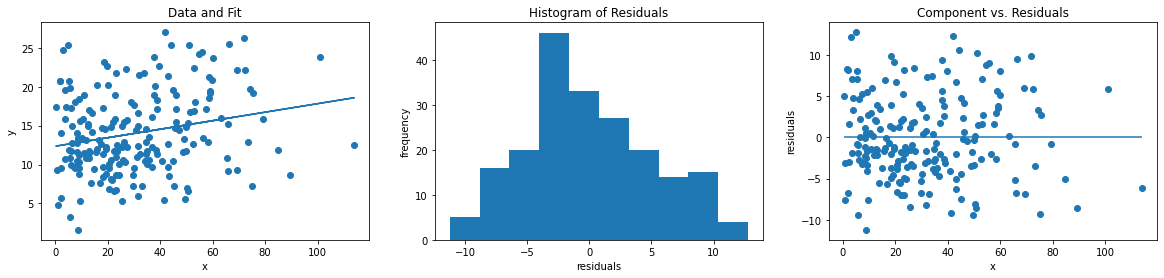

In [107]:
SLRmodel(dfAd["news"],dfAd["sales"])

### Exercise 2 - Advertising Budgets and Multiple Linear Regression
*** 

In this exercise you'll fit a multiple linear regression model to the advertising data. We load it as follows.  

In [7]:
import statsmodels.api as sm 

The following code will fit an MLR model to the data. Note that the add_constant function is necessary in order to include an intercept term in the MLR model. 

In [108]:
# Collect the features in a 2D array 
X = dfAd[["tv", "radio", "news"]]

# Add a constant to the array for the intecept 
X = sm.add_constant(X)

# Collect the response data in an array 
y = dfAd["sales"]

# Fit the ordinary least-squares (OLS) model 
model = sm.OLS(y, X).fit()

The estimated parameters are for the model are stored in model.params.  In this case, because we got $X$ from a Pandas DataFrame, the resulting model parameters are stored in a Pandas Series. 

In [109]:
print(model.params)

const    2.938889
tv       0.045765
radio    0.188530
news    -0.001037
dtype: float64


**Part A**: Based on the parameters estimated by the model, replace the unknown $b_j$ parameters below with the actual values in the model 


In [110]:
print("The MLR model:   Sales = ", round(model.params[0],3)," + ", round(model.params[1],3),"TV + ", round(model.params[2],3),"radio + ", round(model.params[3],3),"news")

The MLR model:   Sales =  2.939  +  0.046 TV +  0.189 radio +  -0.001 news


**Part B**: Print the model.summary() to see information from this model:

In [111]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           1.58e-96
Time:                        13:33:12   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
tv             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
news          -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

NOTE news has large P value so we prob want to leave it out or something. Or maybe not have it as correlated with other guys.

Also, R^2 will grow w more variables.

**Part C**  Is this model "better"?  We have several metrics for analyzing a model's Goodness of Fit:


 - $R^2$
 - RMSE
 - Adjusted $R^2$
 - AIC
 - BIC
 
 Back to the notes!


**Part D**: We can compute the pair-wise correlation between each of the features directly from the DataFrame using Pandas .corr() function.   Does any pair of features seem particularly correlated?

In [42]:
dfAd[["tv", "radio", "news"]].corr()

,tv,radio,news
tv,1.000000,0.054809,0.056648
radio,0.054809,1.000000,0.354104
news,0.056648,0.354104,1.000000


  **Part E**  Refit the model by removing the predictor that was insignificant in the MLR analysis (i.e. remove news):
  

In [118]:
#To Do



**Part F** Compare the adjusted R^2 in this new model to our original model.

**Part G** Since we now are only using 2 predictors, we can visualize this model in 3d!

/var/folders/wt/6c9_5r755rj93jg07m1yf_480000gn/T/ipykernel_77111/1755421491.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


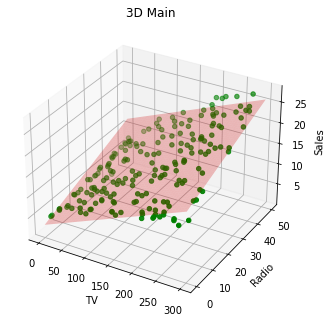

In [117]:
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
 
# creating figure
fig = plt.figure()
ax = Axes3D(fig)
 
# creating the plot
plot_geeks = ax.scatter(dfAd['tv'], dfAd['radio'],dfAd['sales'],  c = "g")
 
# setting title and labels
ax.set_title("3D plot")
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
plt.title("3D Main")
 
x = np.linspace(0, 300, 100)
y = np.linspace(0, 50, 100)

x, y = np.meshgrid(x, y)

#Enter the linear model equation here:
eq =.0458 * x + .188 * y + 2.921



ax.plot_surface(x, y, eq, color='red', alpha=0.25)    
    
# displaying the plot
plt.show()

### Exercise 3 - Checking MLR Assumptions
*** 

Create the following plots:

 -  A histogram of *residuals* of best least-squares fit.

 -  A Q-Q plot of *residuals*, comparing to a normal distribution.

 -   A scatter plot of Predictor vs residuals for EACH of your predictors 

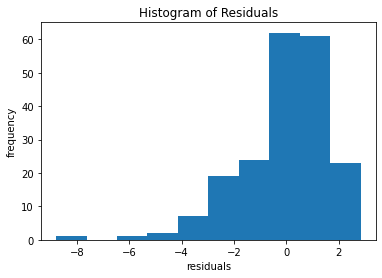

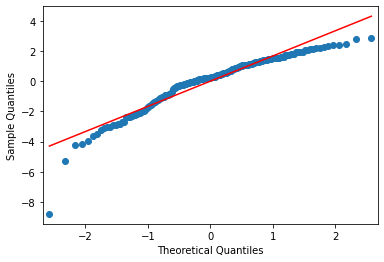

In [43]:
fig, ax= plt.subplots(figsize=(6,4), ncols=1)
ax.hist(model.resid)
ax.set_title('Histogram of Residuals')
ax.set_xlabel("residuals")
ax.set_ylabel("frequency")

sm.qqplot(model.resid, line='s');

Text(0, 0.5, 'residuals')

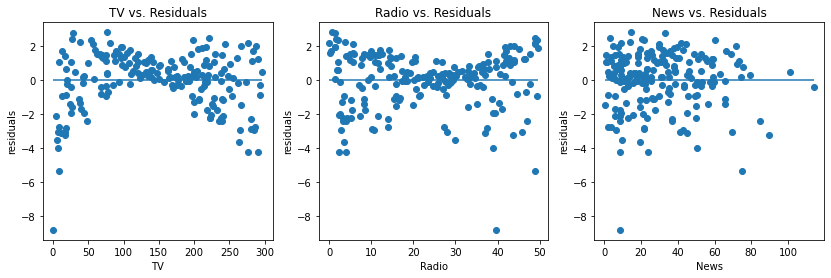

In [44]:
fig, ax= plt.subplots(figsize=(14,4), ncols=3)
ax[0].scatter(dfAd['tv'], model.resid)
ax[0].set_title('TV vs. Residuals')
ax[0].hlines(0, xmin=np.min(dfAd['tv']), xmax=np.max(dfAd['tv']))
ax[0].set_xlabel("TV")
ax[0].set_ylabel("residuals")



ax[1].scatter(dfAd['radio'], model.resid)
ax[1].set_title('Radio vs. Residuals')
ax[1].hlines(0, xmin=np.min(dfAd['radio']), xmax=np.max(dfAd['radio']))
ax[1].set_xlabel("Radio")
ax[1].set_ylabel("residuals")



ax[2].scatter(dfAd['news'], model.resid)
ax[2].set_title('News vs. Residuals')
ax[2].hlines(0, xmin=np.min(dfAd['news']), xmax=np.max(dfAd['news']))
ax[2].set_xlabel("News")
ax[2].set_ylabel("residuals")




### Exercise 3 - Polynomial Regression via Multiple Linear Regression 
*** 

It's not too difficult to believe that some relationships between features and the response are nonlinear. Consider the following example, where the single feature $x$ and the response $y$ have a quadratic relationship of the form 

$$
Y = \frac{1}{4} - X + X^2 + \epsilon 
$$

The following code samples $n=30$ data points from the true model, fits the SLR model, and plots it against the data. It should be clear from both the picture and the $R^2$-value that the SLR model is a very poor fit of the data. 

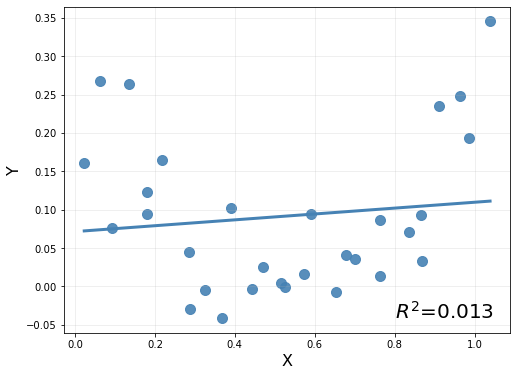

In [29]:
# Generate Data
n, sig = 30, 0.05
x = np.linspace(0,1,n) + 0.05*np.random.rand(n) 
y = 0.25 - x + x**2 + stats.norm.rvs(0,sig,size=n)

# Fit SLR model 
bhat, ahat, rval, pval, stderr = stats.linregress(x, y)

# Plot data and SLR model 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
xplot = np.linspace(np.min(x), np.max(x))
ax.plot(xplot, ahat + bhat*xplot, color="steelblue", lw=3)
ax.scatter(x, y, color="steelblue", s=100, alpha=0.9)
ax.grid(alpha=0.25)
ax.set_xlabel("X", fontsize=16)
ax.set_ylabel("Y", fontsize=16)
ax.text(0.8, np.min(y)+.00, r"$R^2$={:.3f}".format(rval**2), fontsize=20);

**Part A**: We can fit a **polynomial** model to the single-feature data be thinking of the polynomial features as features in a multiple linear regression model.  If we make the association  

$$
x_1 = x \quad \textrm{and} \quad x_2 = x^2 
$$

then we can fit a multiple linear regression of the form 

$$
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 
$$

Let's see how we can do this in python. 

In [30]:
# Collect the linear feature x and it's square in an array 
X = np.column_stack((x, x**2))

# Add a constant to the array for the intecept 
X = sm.add_constant(X)

# Fit the ordinary least-squares (OLS) model 
polymodel = sm.OLS(y, X).fit()

# Print estimated parameters 
print(polymodel.params)

[ 0.26069823 -1.02147251  1.00552832]


**Part B**: Write down the estimated MLR model in terms of the features $x_1$ and $x_2$ as well as the interpretation of the associated polynomial model in terms of the single feature $x$. Does this model seem close to the true model that the data was generated from?  

**Solution**: We have 

$$
\hat{y} = 0.2503 - 0.9347 x_1 + 0.9507 x_2 \quad \textrm{and} \quad 
\hat{y} = 0.2503 - 0.9347 x + 0.9507 x^2 
$$

Yes, it seems very close to the true model that the data was generated from. 

**Part C**: Modify the code below to plot the obtained polynomial regression model against the data.  How does it look?  

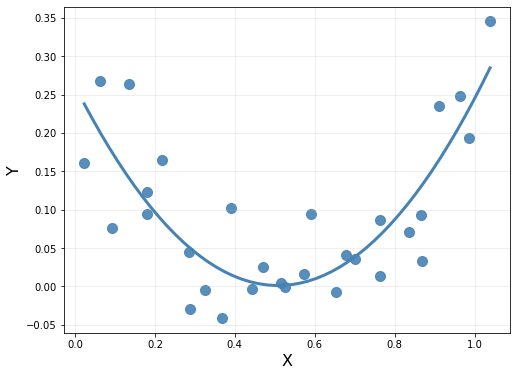

In [31]:
# Plot data and SLR model 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
xplot = np.linspace(np.min(x), np.max(x))
# yplot = #TODO 
yplot = polymodel.params[0] + polymodel.params[1]*xplot + polymodel.params[2]*xplot**2
ax.plot(xplot, yplot, color="steelblue", lw=3)
ax.scatter(x, y, color="steelblue", s=100, alpha=0.9)
ax.grid(alpha=0.25)
ax.set_xlabel("X", fontsize=16)
ax.set_ylabel("Y", fontsize=16);

It looks pretty good! 

**Part D:** Calculate the sum of squared errors, the total sum of squares, and the coefficient of determination for this polynomial regression model. How does the $R^2$ value compare to the linear regression of **Part A**?

In [32]:
def quadfit(x, params):
    return params[0] + params[1]*x + params[2]*x**2

# still have x and y defined from the initial problem set-up
yhat = quadfit(x, polymodel.params)
ybar = np.mean(y)

# sum of squared errors
sse = np.sum((y-yhat)**2)

# total sum of squares
sst = np.sum((y-ybar)**2)

# coefficient of determination
R2 = 1 - sse/sst

print('SSE = {:0.3f}, SST = {:.3f}, and R^2 = {:.3f}'.format(sse,sst,R2))

SSE = 0.097, SST = 0.296, and R^2 = 0.671


### Exercise 4 - Guessing Polynomial Features from Residual Plots 
*** 

In the previous exercise we looked for a polynomial regression model that was quadratic because we already knew the true form of the model (which never happens in practice).  If we don't know how many polynomial features to include in our regression model, we can gain insight into which features might be missing by plotting the associated residuals.  Recall that the residual is the difference between the true response value $y$ and the response predicted by the model, $\hat{y}$: 

$$
r_i = y_i - \hat{y}_i 
$$

**Part A**: Suppose that your data really is linear.  What do you expect a scatter plot of the residuals to look like? 

We would expect the residuals to be normally distributed about $0$. 

**Note**: Before continuing, scroll down and execute the cell in the **Helper Functions** section at the bottom of this notebook. 

**Part B**: The following code samples data from a true linear model, fits a SLR model to it, and plots the model and the associated residuals.  Does the residual plot agree with what you concluded in **Part A**? 

Fitted PLR Model: yhat = 0.819 + 0.592 x^1 

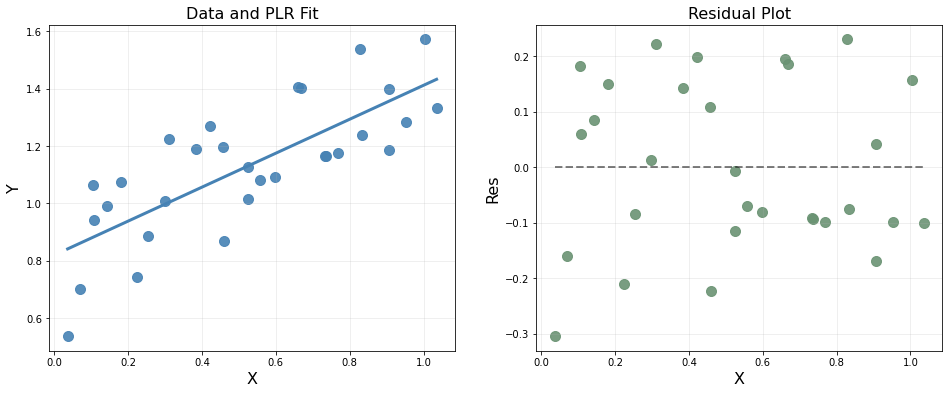

In [35]:
X, y = nonlinear_data(dataset=0)
fit_and_res_plot(X, y)

**Part C**: Now consider a data set that is not linear.  What do you notice about the associated residual plot? 

Fitted PLR Model: yhat = 0.127 + 0.020 x^1 

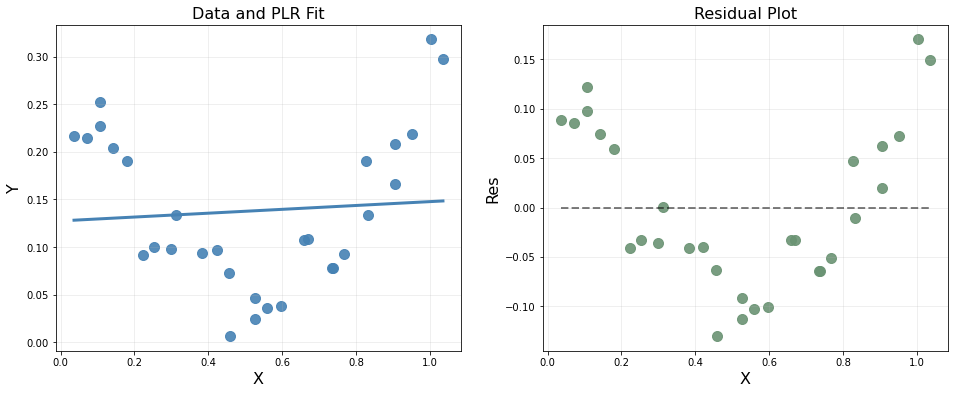

In [36]:
X, y = nonlinear_data(dataset=1)
fit_and_res_plot(X, y)

**Part C**: What polynomial feature do you think is missing?  Complete the following code be adding the missing feature and running the fit again.  What does the residual plot look like now? 

Fitted PLR Model: yhat = 0.302 + -0.964 x^1 + 0.936 x^2 

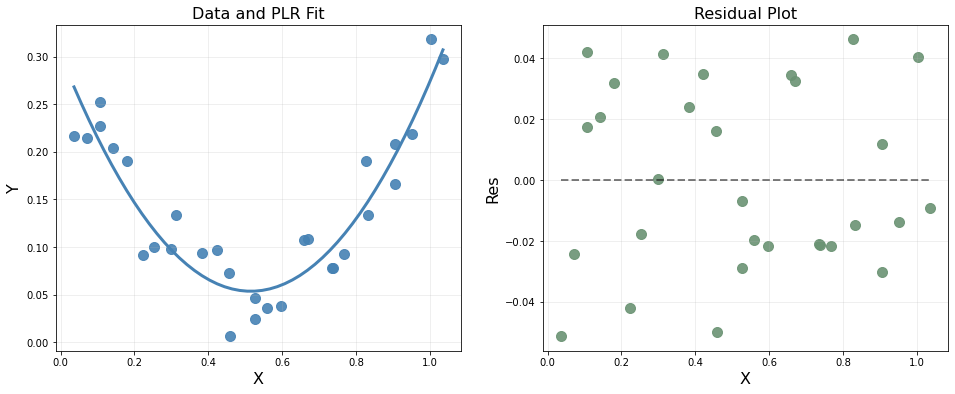

In [45]:
X, y = nonlinear_data(dataset=1)
X = np.column_stack((X, X**2))
fit_and_res_plot(X, y)

**Part C**: OK, one more dataset.  See if you can figure out the missing features and obtain a polynomial regression model that fits the data. 

Fitted PLR Model: yhat = 0.697 + 1.661 x^1 

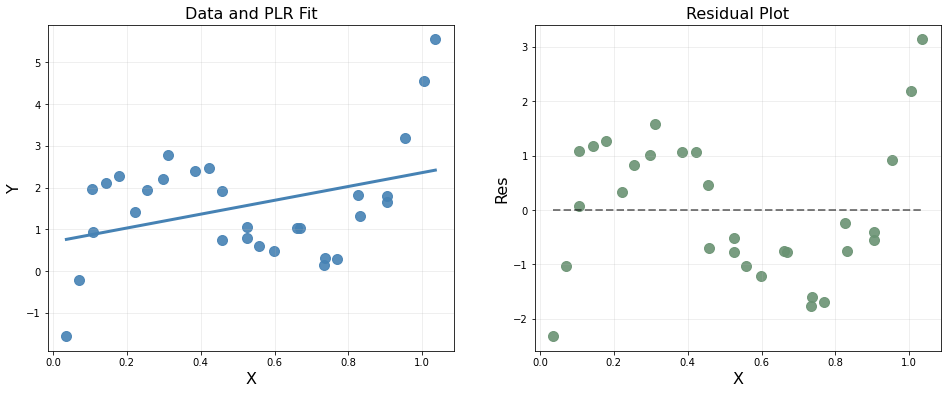

In [46]:
X, y = nonlinear_data(dataset=2)
fit_and_res_plot(X, y)

Fitted PLR Model: yhat = -1.832 + 33.191 x^1 + -79.917 x^2 + 52.987 x^3 

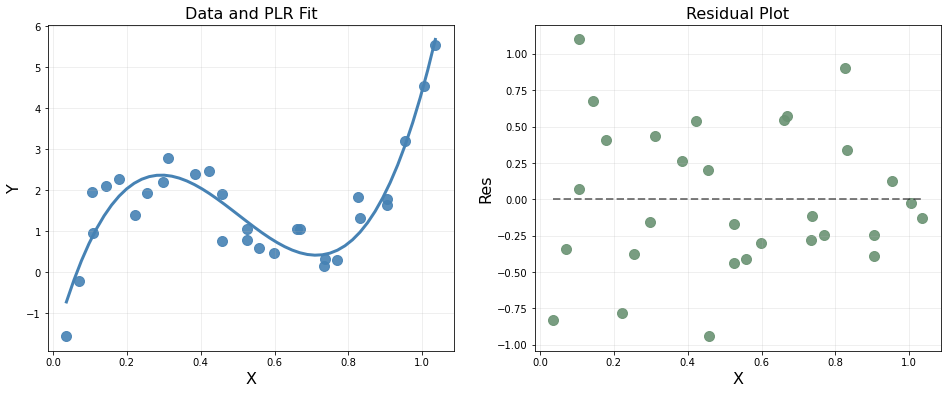

In [47]:
X = np.column_stack((X, X**2, X**3))
fit_and_res_plot(X, y)

<br><br><br><br>
<br><br><br><br>
<br><br><br><br>
<br><br><br><br>

### Helper Functions
***

In [34]:
def nonlinear_data(dataset, n=30):
    
    if dataset < 0 or dataset > 2: 
        print("Datasets must be numbered 0-2.  Defaulting to 0.")
        dataset = 0
    
    np.random.seed(1237)
    
    X = np.linspace(0,1,n) + .05 * np.random.rand(n)
    
    if dataset == 0: 
        return X, 0.5 + 0.75 * X + .5*np.random.rand(n)
    elif dataset == 1: 
        return X, 0.25 - X + X*X + .1*np.random.rand(n)
    elif dataset == 2: 
        return X, 2*(3*(2*x-1.2)**3 + 2*(2*x-1.2)**2 -(2*x-1.2)) + 1.5*np.random.rand(n)

def fit_and_res_plot(X, y, hint=False):
    
    if len(X.shape)==1:
        x = X
    else:
        x = X[:,0]
    
    # Fit Data 
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit() 
    
    # Print fitted model 
    print("Fitted PLR Model: yhat = ", end="")
    for p, beta in enumerate(model.params):
        print("{:.3f}".format(beta), end="")
        if p > 0: 
            print(" x^{} ".format(p), end="")
        else:
            print(" ", end="")
        if p != len(model.params)-1:
            print("+ ", end="")
            
    # Plot data/fit 
    yhat = model.predict(X)
    res = y - yhat 
    xp = np.linspace(np.min(x), np.max(x), 50)
    yp = np.zeros(len(xp))
    for p, beta in enumerate(model.params):
        yp += beta * xp**p 
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
    axes[0].scatter(x, y, color="steelblue", s=100, alpha=0.9)
    axes[0].plot(xp, yp, color="steelblue", lw=3)
    axes[0].grid(alpha=0.25)
    axes[0].set_xlabel("X", fontsize=16)
    axes[0].set_ylabel("Y", fontsize=16)
    axes[0].set_title("Data and PLR Fit", fontsize=16)
    
    # Plot residuals 
    axes[1].plot([np.min(x), np.max(x)], [0, 0], lw=2, ls="--", alpha=0.5, color="black")
    axes[1].scatter(x, res, color="#6a9373", s=100, alpha=0.9)
    axes[1].grid(alpha=0.25)
    axes[1].set_xlabel("X", fontsize=16)
    axes[1].set_ylabel("Res", fontsize=16)
    axes[1].set_title("Residual Plot", fontsize=16)
    